In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd

In [2]:
ls

BOWTIE 14h.txt* EDGES 14h.txt*  ISO 14h.txt*    MIST 14h.txt*   Untitled.ipynb


In [138]:
df=pd.read_csv('figure1_plotdata.csv')[3:-3]
df.head()

,Frequency [MHz],Weight,a: Tsky [K],b: Tres1 [K],c: Tres2 [K],d: Tmodel [K],e: T21 [K]
3,51.184082,1,4645.468619,-0.034440,-0.099255,0.0,-0.099255
4,51.574707,1,4556.501107,0.071895,0.021244,0.0,0.021244
5,51.965332,1,4469.791669,0.069184,0.032533,0.0,0.032533
6,52.355957,1,4385.322184,0.021121,-0.001962,0.0,-0.001962
7,52.746582,1,4303.120393,0.033718,0.023546,0.0,0.023546


In [3]:
bwt=np.loadtxt('BOWTIE 14h.txt')
edg=np.loadtxt('EDGES 14h.txt')
iso=np.loadtxt('ISO 14h.txt')
mst=np.loadtxt('MIST 14h.txt')

In [17]:
nu=np.linspace(40,120,len(bwt))

In [28]:
dnu=nu[1]-nu[0]

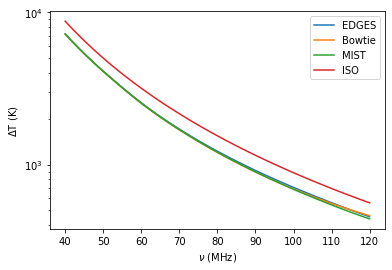

In [54]:
plt.plot(nu,edg,label='EDGES')
plt.plot(nu,bwt,label='Bowtie')
plt.plot(nu,mst,label='MIST')
plt.plot(nu,iso,label='ISO')

plt.yscale('log')
#plt.xlim(60,100)
#plt.ylim(200,700)
plt.xlabel(r'$\nu$ (MHz)')
plt.ylabel(r'$\Delta$T (K)')

plt.legend()

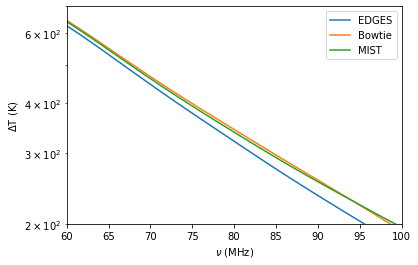

In [26]:
plt.plot(nu,-edg+iso,label='EDGES')
plt.plot(nu,-bwt+iso,label='Bowtie')
plt.plot(nu,-mst+iso,label='MIST')
plt.yscale('log')
plt.xlim(60,100)
plt.ylim(200,700)
plt.xlabel(r'$\nu$ (MHz)')
plt.ylabel(r'$\Delta$T (K)')

plt.legend()

In [ ]:
# se puede argumentar que EDGES decae más rápido -> pendiente más pronunciada -> más cromaticidad?

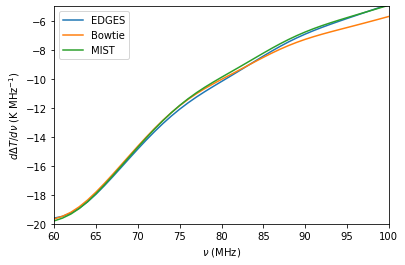

In [49]:
plt.plot(nu[:-1],np.diff(-edg+iso)/dnu,label='EDGES')
plt.plot(nu[:-1],np.diff(-bwt+iso)/dnu,label='Bowtie')
plt.plot(nu[:-1],np.diff(-mst+iso)/dnu,label='MIST')

plt.xlim(60,100)
plt.ylim(-20,-5)
plt.xlabel(r'$\nu$ (MHz)')
plt.ylabel(r'$d\Delta T/d\nu$ (K MHz$^{-1}$)')
plt.legend()
# Bowtie es más plana

In [53]:
# bowtie tiene menor desviación respecto a la media -> es esto lo mismo que el rms?
(np.diff(-edg+iso)/dnu).std(),(np.diff(-bwt+iso)/dnu).std(),(np.diff(-mst+iso)/dnu).std()

(19.568746696116914, 19.37470585572331, 19.527354667073013)

In [58]:
# bowtie tiene menor desviación respecto a la media en ese rango (simplemente mirando las diferencias) 
# -> es esto lo mismo que el rms?

(-edg+iso)[20:60].std(),(-bwt+iso)[20:60].std(),(-mst+iso)[20:60].std()

(130.61814132438943, 130.28412309812438, 128.63350555489114)

In [59]:
ds_iso=np.loadtxt('DS ISO.txt')

In [62]:
len(ds_iso)

240

In [119]:
ds_edg=np.loadtxt('DS+G EDGES.txt')[::-1]

In [120]:
c = np.arange(1, len(ds_edg)/10 + 1)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

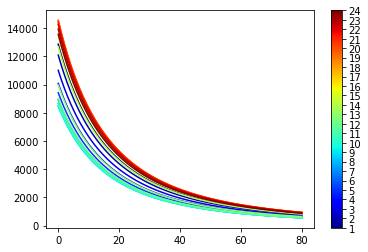

In [121]:
for i in np.arange(len(ds_edg))[::10]:
    plt.plot(ds_iso[i], c=cmap.to_rgba(i//10 + 1))
plt.colorbar(cmap, ticks=c)

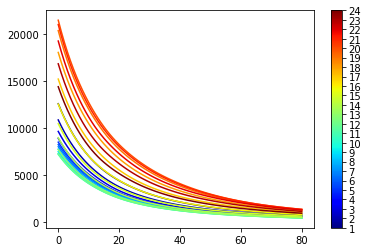

In [122]:
for i in np.arange(len(ds_edg))[::10]:
    plt.plot(ds_edg[i], c=cmap.to_rgba(i//10 + 1))
plt.colorbar(cmap, ticks=c)

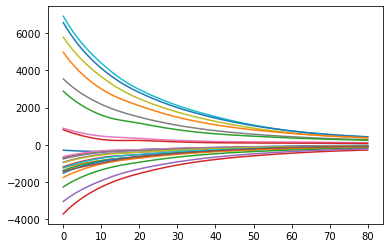

In [123]:
for i in np.arange(len(ds_edg))[::10]:
    plt.plot(ds_edg[i]-ds_iso[i])

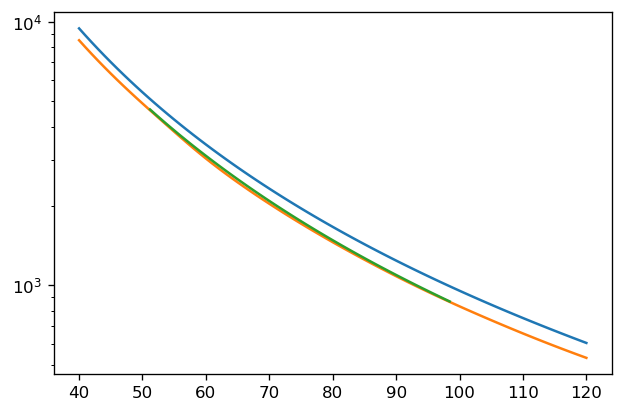

In [180]:
hr=4
plt.figure(dpi=120)
plt.plot(nu,ds_iso[hr*10])
plt.plot(nu,ds_edg[hr*10])
plt.plot(df['Frequency [MHz]'],df.iloc[:, 2])
plt.yscale('log')


In [181]:
ipl=np.interp(df.iloc[:, 0],nu,ds_edg[hr*10])

In [182]:
((df.iloc[:, 2]-ipl)>0).sum()/len(ipl)

1.0

In [183]:
(df.iloc[:, 2]-ipl).std() # 4h da la menor desviación estándar

22.29991504348459

(array([19., 17., 11., 14., 11., 10.,  7.,  7.,  9., 17.]),
 array([ 3.39557437, 10.42932807, 17.46308178, 24.49683549, 31.53058919,
        38.5643429 , 45.59809661, 52.63185031, 59.66560402, 66.69935773,
        73.73311143]),
 <a list of 10 Patch objects>)

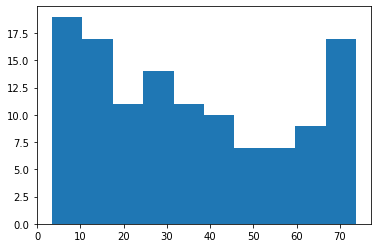

In [184]:
plt.hist(df.iloc[:, 2]-ipl)

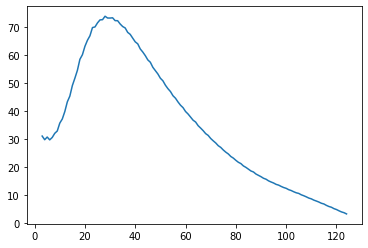

In [185]:
plt.plot(df.iloc[:, 2]-ipl)